In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
blobs = pd.read_csv("blobs.csv")

In [3]:
blobs

,x1,x2
0,5.943182,-3.500306
1,-7.225687,0.680714
2,-7.651328,2.813673
3,5.920315,-8.113558
4,-7.450757,1.236711
...,...,...
195,6.912867,-8.095758
196,-7.599752,3.051744
197,-7.329580,2.459773
198,-9.666825,3.217633


# Making Features

In [4]:
features = blobs.to_numpy()

In [5]:
features[:5]

array([[ 5.94318188, -3.50030621],
       [-7.22568717,  0.68071409],
       [-7.65132821,  2.81367312],
       [ 5.92031548, -8.11355755],
       [-7.45075723,  1.23671056]])

# Scaling Features

In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [36]:
scaled_features[:5]

array([[ 0.51943536,  0.003575  ],
       [-1.32112199,  0.91529844],
       [-1.38061205,  1.38041666],
       [ 0.51623942, -1.00240178],
       [-1.35257909,  1.03654037]])

In [37]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=500,
        random_state=42
    )

# Fit first with features without scaling

In [38]:
kmeans.fit(features)

KMeans(init='random', max_iter=500, n_clusters=3, random_state=42)

In [39]:
 # The lowest SSE value
kmeans.inertia_

383.048332545841

In [40]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-7.83589352,  1.94532476],
       [ 7.9170901 , -3.37363925],
       [ 6.44875079, -9.04026458]])

In [41]:
kmeans.n_iter_

4

In [42]:
kmeans.labels_[:5]

array([1, 0, 0, 2, 0])

In [43]:
kmeans.labels_

array([1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0])

In [44]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [77]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

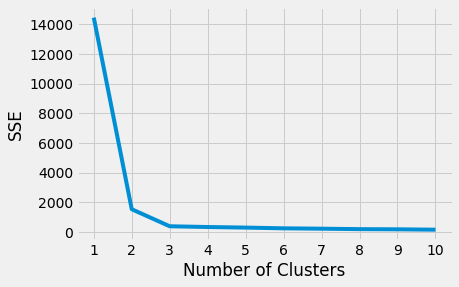

In [78]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [79]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [80]:
kl.elbow

2

In [81]:
y_kmeans = kmeans.predict(features)

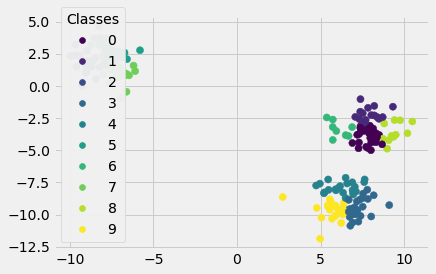

In [82]:
fig, ax = plt.subplots()
scatter = plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


# Now with scaled Features

In [51]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=10, random_state=42)

In [52]:
 # The lowest SSE value
kmeans.inertia_

4.563345538989763

In [53]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.69131624,  0.03479915],
       [-1.49774921,  1.44639557],
       [ 0.85964328, -0.15598868],
       [-1.35626511,  0.91315183],
       [ 0.66982606, -0.92160061],
       [ 0.57341188, -1.40703464],
       [ 0.71843086, -1.16805151],
       [ 0.85400604,  0.27577234],
       [-1.38543281,  1.21240864],
       [ 0.43280216, -1.01284327]])

In [54]:
kmeans.n_iter_

9

In [55]:
kmeans.labels_[:5]

array([0, 3, 1, 9, 3])

In [56]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [71]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

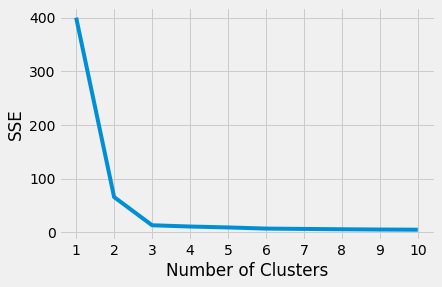

In [72]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [73]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [74]:
kl.elbow

3

In [75]:
y_kmeans = kmeans.predict(features)

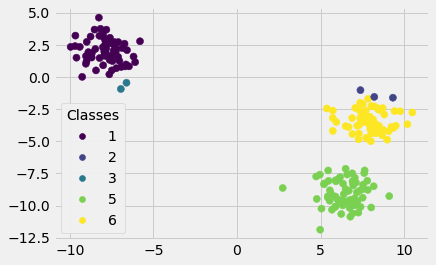

In [76]:
fig, ax = plt.subplots()
scatter = plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


# Using Circles Dataset

In [83]:
circles = pd.read_csv("circles.csv")

In [84]:
features = circles.to_numpy()

In [85]:
features[:5]

array([[-0.88821555, -0.49879509],
       [-0.78463728,  0.6747389 ],
       [-0.5323783 ,  0.86799   ],
       [ 0.76117401,  0.06131124],
       [ 0.3897783 , -0.6443342 ]])

In [86]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [87]:
scaled_features[:5]

array([[-1.38624556, -0.78087363],
       [-1.22526495,  1.05054392],
       [-0.83320582,  1.35213164],
       [ 1.17722411,  0.09322849],
       [ 0.6000035 , -1.00800202]])

In [88]:
kmeans = KMeans(
        init="random",
        n_clusters=2,
        n_init=10,
        max_iter=500,
        random_state=42
    )

In [89]:
kmeans.fit(features)

KMeans(init='random', max_iter=500, n_clusters=2, random_state=42)

In [90]:
 # The lowest SSE value
kmeans.inertia_

98.31679648692753

In [91]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.42932906, -0.422237  ],
       [-0.38914298,  0.39278103]])

In [92]:
kmeans.n_iter_

3

In [93]:
kmeans.labels_[:5]

array([1, 1, 1, 0, 0])

In [94]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1])

In [63]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [95]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

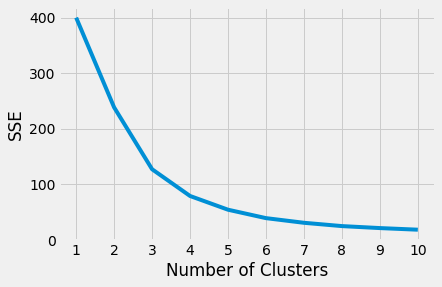

In [96]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [97]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [98]:
kl.elbow

4

In [99]:
y_kmeans = kmeans.predict(features)

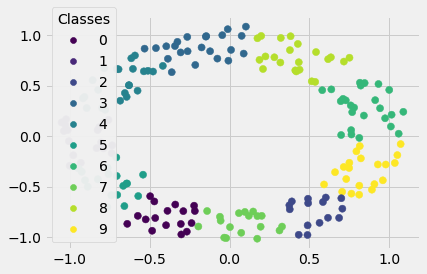

In [100]:
fig, ax = plt.subplots()
scatter = plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# Using scaled features

In [101]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=10, random_state=42)

In [102]:
 # The lowest SSE value
kmeans.inertia_

18.31155327783049

In [103]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.59513655, -1.25585697],
       [-1.38609081, -0.02491061],
       [ 0.78325901, -1.20015173],
       [-0.31231408,  1.36065939],
       [-1.07385736,  0.82526385],
       [-1.16250675, -0.74228381],
       [ 1.29637248,  0.43688769],
       [ 0.09030741, -1.33054864],
       [ 0.63770747,  1.21021766],
       [ 1.29212099, -0.5452417 ]])

In [104]:
kmeans.n_iter_

9

In [105]:
kmeans.labels_[:5]

array([5, 4, 3, 6, 2])

In [106]:
kmeans.labels_

array([5, 4, 3, 6, 2, 9, 9, 6, 3, 0, 0, 8, 6, 9, 6, 8, 5, 4, 4, 5, 1, 8,
       4, 9, 3, 5, 4, 3, 9, 3, 1, 0, 9, 7, 7, 9, 7, 0, 0, 7, 6, 6, 9, 8,
       5, 8, 8, 4, 2, 3, 9, 3, 8, 1, 3, 7, 7, 6, 6, 4, 8, 0, 7, 4, 8, 6,
       3, 6, 1, 0, 5, 2, 2, 5, 0, 8, 8, 8, 9, 8, 1, 9, 2, 8, 9, 8, 2, 3,
       2, 1, 9, 4, 5, 2, 1, 6, 9, 9, 1, 7, 7, 8, 9, 1, 6, 0, 2, 1, 6, 8,
       6, 1, 7, 0, 1, 0, 2, 3, 1, 5, 7, 9, 1, 5, 4, 2, 7, 4, 0, 6, 3, 2,
       2, 6, 3, 3, 3, 6, 0, 6, 1, 4, 6, 2, 0, 8, 4, 5, 6, 2, 1, 3, 7, 4,
       3, 6, 0, 1, 1, 3, 9, 3, 8, 8, 7, 6, 5, 3, 6, 5, 8, 5, 5, 6, 9, 4,
       2, 9, 0, 1, 4, 5, 5, 4, 1, 6, 8, 7, 3, 3, 0, 3, 4, 9, 2, 3, 4, 0,
       4, 4])

In [107]:
kmeans_kwargs = {
       "init": "random",
      "n_init": 10,
      "max_iter": 300,
       "random_state": 42,
    }

In [108]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

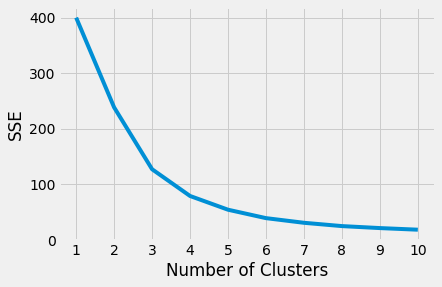

In [109]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [110]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

In [111]:
kl.elbow

4

In [112]:
y_kmeans = kmeans.predict(scaled_features)

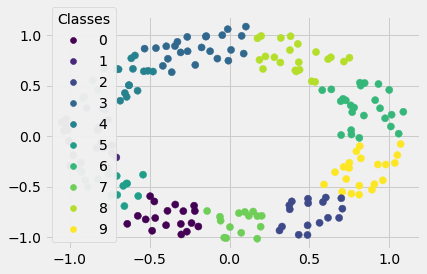

In [113]:
fig, ax = plt.subplots()
scatter = plt.scatter(features[:, 0], features[:, 1], c=y_kmeans, s=50, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)